# `Part 3: Exploratory Data Analysis`

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import t

In [2]:
# Reading in the csv file.
bank_dataset = pd.read_csv('./bank dataset (cleaned).csv')

In [3]:
bank_dataset = bank_dataset.drop(labels='Unnamed: 0', axis=1)

Things to note:
- The column 'days_passed' has been feature engineered to a column called 'prev_part' which reflects whether or not a customer has been previously contacted for another campaign. 'days_passed' will still be used in the EDA process but will eventually be dropped when building ML models.
- The target variable 'subscription' has severe class imbalance.

Limitations of the data:
1. Annual salary of customers not included. This may even be more useful than the occupation and education level.
2. Demographics not included. This may provide information on whether those living in social isolation may have a greater appreciate for telemarketing.
3. It does not include total number of times a customer defaulted credit.
4. Magnitude of current housing & personal loan not included.
5. Does not contain a text summary of call.

(_Please refer to the Data Dictionary.txt file for a comprehensive explanation for each variable._)

***

***

## Sample overview

In [4]:
# Create a continuous variable dataframe.
continuous = {}
for cols in bank_dataset.columns:
        if bank_dataset[cols].dtypes == int:
            continuous[cols] = bank_dataset[cols]
        elif bank_dataset[cols].dtypes == 'float64':
            continuous[cols] = bank_dataset[cols]
        else:
            pass

In [5]:
continuous = pd.DataFrame(continuous)

In [6]:
continuous['subscription'] = bank_dataset['subscription']

In [7]:
### pearsons & pairplot

In [8]:
# Create a categorical variable dataframe.
categorical = {}
for cols in bank_dataset.columns:
        if bank_dataset[cols].dtypes == 'O':
            categorical[cols] = bank_dataset[cols]
        else:
            pass

In [9]:
categorical = pd.DataFrame(categorical)

In [10]:
# average age (this column & the rest below are assumed to be normally distributed based on Central Limit Theorem).
print "The mean is " + str(np.mean(bank_dataset['age'])) + "."
print "The standard deviation is " + str(np.std(bank_dataset['age'])) + "."
t_interval_95 = t.interval(0.95,
                           30473,
                           loc=np.mean(bank_dataset['age']),
                           scale=np.std(bank_dataset['age'])*2)

print "We are 95% confident that the true mean value for 'AGE' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + " years of age."

The mean is 39.0288442607.
The standard deviation is 10.3322085363.
We are 95% confident that the true mean value for 'AGE' is between -1.47427771574813 and 79.53196623711061 years of age.


In [11]:
# average number of contacts performed during this campaign.
print "The mean is " + str(np.mean(bank_dataset['contact_freq'])) + "."
print "The standard deviation is " + str(np.std(bank_dataset['contact_freq'])) + "."
t_interval_95 = t.interval(0.95,
                           30473,
                           loc=np.mean(bank_dataset['contact_freq']),
                           scale=np.std(bank_dataset['contact_freq'])*2)

print "We are 95% confident that the true mean value for 'CONTACT_FREQ' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + " times."

The mean is 2.52142810264.
The standard deviation is 2.72027544899.
We are 95% confident that the true mean value for 'CONTACT_FREQ' is between -8.142279267621642 and 13.185135472911398 times.


In [12]:
# average duration of a phone call.
print "The mean is " + str(np.mean(bank_dataset['duration'])) + "."
print "The standard deviation is " + str(np.std(bank_dataset['duration'])) + "."
t_interval_95 = t.interval(0.95,
                           30473,
                           loc=np.mean(bank_dataset['contact_freq']),
                           scale=np.std(bank_dataset['contact_freq'])*2)

print "We are 95% confident that the true mean value for 'DURATION' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + " seconds."

The mean is 259.547187767.
The standard deviation is 261.742388473.
We are 95% confident that the true mean value for 'DURATION' is between -8.142279267621642 and 13.185135472911398 seconds.


In [13]:
# Determining Outliers
boxplot_var = continuous[['age','contact_freq','duration']]

In [14]:
boxplot_var.plot(kind='box',subplots=True,title=' ',figsize=(20,6))

age                AxesSubplot(0.125,0.11;0.227941x0.77)
contact_freq    AxesSubplot(0.398529,0.11;0.227941x0.77)
duration        AxesSubplot(0.672059,0.11;0.227941x0.77)
dtype: object

__Comments:__
1. There are no real outliers for age and contact_freq given the proximity of all the values that fall out of range.
2. The duration column does have some extreme values for call time. This information should still be included as it may reflect some customers wanting to find out more or those whom are interested but are not ready to put down a term deposit. This must work in hand with a text summary of the call.

## Preconceived opinions

1. Customers who are 'entrepreneur'/'management'/'retired' more likely to subscribe compared to 'housemaid'/'admin'/'student'/'self-employed'/'blue-collar'?

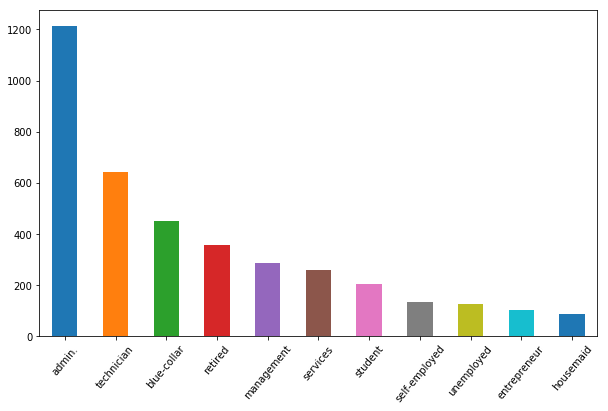

In [15]:
bank_dataset[bank_dataset['subscription']==1]['occupation'].value_counts().plot(kind='bar',figsize=(10,6),fontsize=10,rot=50)

<br>2. Certain months of a year may perform better in the number of subscriptions due to seasonality factors.
<br> As such, which months have the highest number of subscriptions?

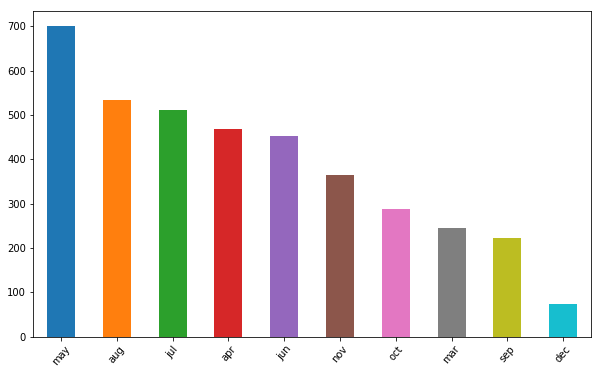

In [16]:
bank_dataset[bank_dataset['subscription']==1]['month'].value_counts().plot(kind='bar',figsize=(10,6),fontsize=10,rot=50)

<br> 3. Which day of the week has the higest subscription?
<br> (Certain days of a week may be less busy, e.g. Friday being resulting in customers more receptive to telemarketing and in turn, subscribing.)


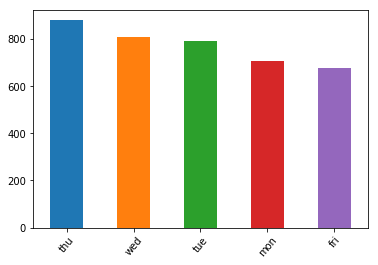

In [17]:
bank_dataset[bank_dataset['subscription']==1]['day'].value_counts().plot(kind='bar',figsize=(6,4),fontsize=10,rot=50)

<br>4. What is the average number of contacts carried out within this campaign before a customer subscribes?

In [18]:
print "The mean is " + str(bank_dataset[bank_dataset['subscription']==1]['contact_freq'].mean()) + "."
print "The standard deviation is " + str(bank_dataset[bank_dataset['subscription']==1]['contact_freq'].std()) + "."
print '-----'
t_interval_95 = t.interval(0.95,
                           len(bank_dataset[bank_dataset['subscription']==1]['contact_freq'])-1,
                           loc=bank_dataset[bank_dataset['subscription']==1]['contact_freq'].mean(),
                           scale=(bank_dataset[bank_dataset['subscription']==1]['contact_freq'].std()/(bank_dataset[bank_dataset['subscription']==1]['contact_freq'])**0.5))

print "We are 95% confident that the true mean value for 'CONTACT_FREQ' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + " times."

The mean is 2.02721617418.
The standard deviation is 1.62478073762.
-----
We are 95% confident that the true mean value for 'CONTACT_FREQ' is between [-1.15829519 -0.22528052  0.18806033 ... -1.15829519 -1.15829519
 -1.15829519] and [5.21272754 4.27971286 3.86637202 ... 5.21272754 5.21272754 5.21272754] times.


<br>5. Does duration of phonecall increase with age?
- or are the younger generation more willing to put down term deposits because they are happy to wait for the interest upon its maturity and hence, will speak longer over the phone to enquire?

In [19]:
ads = continuous[['age','duration','subscription']]

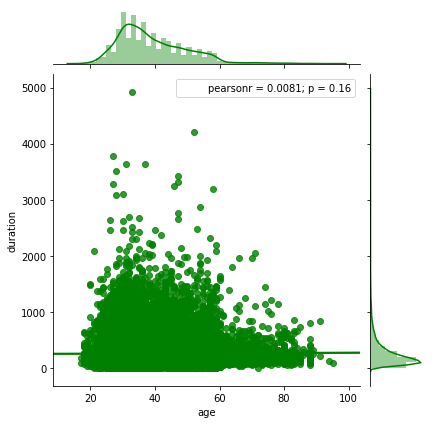

In [20]:
import seaborn as sns
sns.jointplot(x='age',y='duration',data=ads,kind='reg',color='g')

## Hypothesis Testing

1. Identifying mean difference in age between customers that subscribe or not.

Preconceived opinions:
1. Customers who were 'entrepreneur'/'management'/'retired' were more likely to subscribe compared to 'housemaid'/'admin'/'student'/'self-employed'/'blue-collar'.
 - Nothing discriminatory. It is just that certain customer profiles do have cashflow freed up for investment purposes.
2. Certain months of a year may perform better in the number of subscriptions due to seasonality factors. As such, which months have the highest number of subscriptions?
3. Certain days of a week may be less busy (e.g. Friday) resulting in customers more receptive to telemarketing and in turn, subscribing.
4. What is the mean number of contacts before a subscription is made.
5. Plot a linear relationship between age & duration to determine if customers of an older age tend to speak for longer over the phone.
 - An assumption could be that they are more receptive to telemarketing or they are at a life stage whereby term deposits are more applicable to them.

Assumptions:
1. There is a mean difference in age between customers that subscribe or not.
2. Customers who are 'single' or 'divorced' are more likely to subscribe compared to those whom are 'married'.
3. Those with 'housing_loan' or 'personal_loan' are less likely to subscribe.
4. There is a mean difference in phone call 'duration' between those who subscribed and those who did not.
5. Mean difference in consumer confidence index between those who subscribed and those who did not??

PCA